# SVR Regression

### Importing Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

### Setting Datasets directory and Importing dataset 

In [2]:
os.chdir("C:\\Users\\Thiago\\Desktop\\Python-ML\\Datasets")

dataset = pd.read_csv("Position_Salaries.csv")

### Creating features and target variables

In [9]:
X = dataset.iloc[:,1:2].values
y = dataset.iloc[:,2:3].values

# PREPROCESSING 

### Splitting in Training and Test set 

In [ ]:
# The dataset is too small, so this step is note necessary
from sklearn.model_selection import train_test_split
X_treino,X_teste,y_treino,y_teste = train_test_split(X, y, test_size=0.2, random_state=0)

### Feature Scaling

In [10]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)

C:\Users\Thiago\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\utils\validation.py:590: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Thiago\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\utils\validation.py:590: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Thiago\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\utils\validation.py:590: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Thiago\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\utils\validation.py:590: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


# CREATING THE MODEL

### Fitting the Regression model

In [11]:
from sklearn.svm import SVR
regressor = SVR(kernel='rbf')
regressor.fit(X,y)

C:\Users\Thiago\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False)

### Predicting Results

In [32]:
y_pred = regressor.predict(X)

#### Predicting a single result, with standard scaling 

In [31]:
y_pred = sc_y.inverse_transform(regressor.predict(sc_X.transform(np.array([[6.5]]))))
y_pred

array([170370.0204065])

### Visualiazing Regression Results

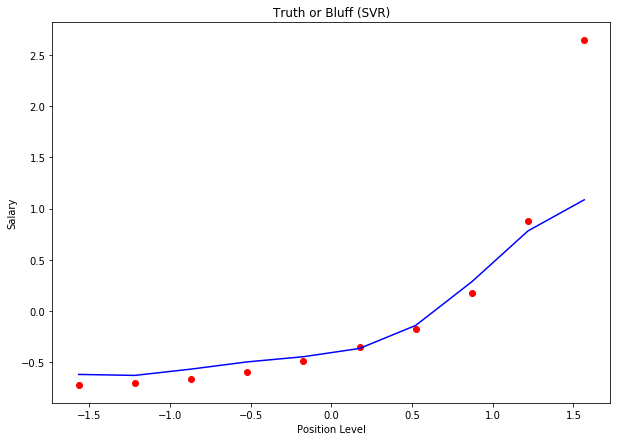

In [27]:
plt.figure(figsize = (10,7))

plt.scatter(X, y , color ="red")
plt.plot(X, regressor.predict(X), color = "blue")
plt.title("Truth or Bluff (SVR)")
plt.xlabel("Position Level")
plt.ylabel("Salary")
plt.show()

### Visualiazing Regression Results in Higher Resolution

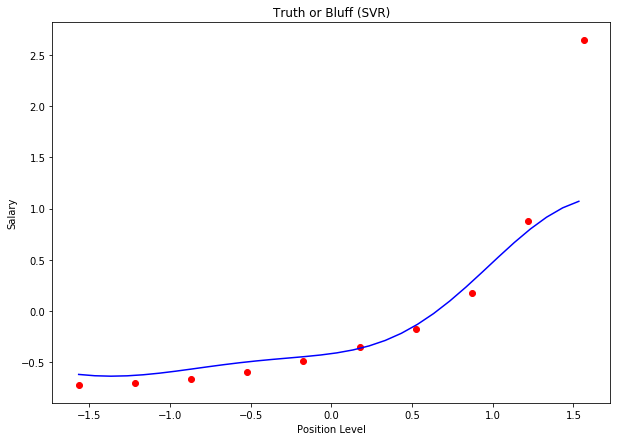

In [33]:
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))

plt.figure(figsize = (10,7))

plt.scatter(X, y , color ="red")
plt.plot(X_grid, regressor.predict(X_grid), color = "blue")
plt.title("Truth or Bluff (SVR)")
plt.xlabel("Position Level")
plt.ylabel("Salary")
plt.show()